# Content
starwars-episode-N-interactions.json contains the social network extracted from Episode N, where the links between characters are defined by the times the characters speak within the same scene.

## Nodes

**name:** Name of the character  
**value:** Number of scenes the character appeared in  
**colour:** Colour in the visualization  

## Links represent connections between characters  

**source:** zero-based index of the character that is one end of the link, the order of nodes is the order in which they are listed in the “nodes” element  
**target:** zero-based index of the character that is the the other end of the link.  
**value:** Number of scenes where the “source character” and “target character” of the link appeared together.  

The network is undirected and which character represents the source and the target is arbitrary, they correspond only to two ends of the link.

# Import relevant libraries

In [1]:
import os
import json
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load data

In [2]:
# setup data path
base_path = os.path.join('..', 'datasets')
file_path = os.path.join(base_path, 'starwars-full-interactions.json')

with open(file_path) as json_file:
    data = json.load(json_file)

In [3]:
nodes = data['nodes']

In [4]:
edges = data['links']

In [5]:
df_nodes = pd.DataFrame(nodes)
df_nodes.head()

,name,value,colour
0,QUI-GON,61,#4f4fb1
1,NUTE GUNRAY,24,#808080
2,PK-4,3,#808080
3,TC-14,4,#808080
4,OBI-WAN,147,#48D1CC


In [6]:
df_nodes.sort_values(by = 'value', ascending = False).head(10)

,name,value,colour
70,HAN,169,#ff9400
64,LUKE,160,#3881e5
21,C-3PO,150,#FFD700
4,OBI-WAN,147,#48D1CC
17,ANAKIN,131,#ce3b59
67,LEIA,98,#DCDCDC
14,PADME,74,#DDA0DD
94,FINN,63,#07b19f
0,QUI-GON,61,#4f4fb1
63,DARTH VADER,58,#000000


In [7]:
df_edges = pd.DataFrame(edges)
df_edges.head()

,source,target,value
0,1,0,1
1,2,3,1
2,4,3,1
3,0,3,1
4,4,0,26


In [8]:
df_nodes.reset_index(inplace = True)
df_nodes.head()

,index,name,value,colour
0,0,QUI-GON,61,#4f4fb1
1,1,NUTE GUNRAY,24,#808080
2,2,PK-4,3,#808080
3,3,TC-14,4,#808080
4,4,OBI-WAN,147,#48D1CC


In [9]:
df_nodes.rename(columns = {'index' : 'node_id'}, inplace = True)
df_nodes.head()

,node_id,name,value,colour
0,0,QUI-GON,61,#4f4fb1
1,1,NUTE GUNRAY,24,#808080
2,2,PK-4,3,#808080
3,3,TC-14,4,#808080
4,4,OBI-WAN,147,#48D1CC


In [10]:
nodes_list = list(df_nodes.node_id)

In [11]:
edges_list = list(zip(df_edges.source, df_edges.target))

In [12]:
weight = list(df_edges.value)

In [13]:
# initialize a new graph object
G = nx.Graph()

# populate the graph with nodes
G.add_nodes_from(nodes_list)

# populate the graph with edges
G.add_edges_from(edges_list, edge_attr =df_edges.value)

In [14]:
# plot decoration
# map the color of each node with its community
colors = list(df_nodes.colour)
color_map = []
# loop over nodes in G
for node in G:
    color_map.append(colors[node])

options = {
    'node_color': color_map,
    'node_size': 400,
    'alpha': 1,
    'width': 1,
    'with_labels': True,
    'font_size': 10,
    'font_color': 'white'}

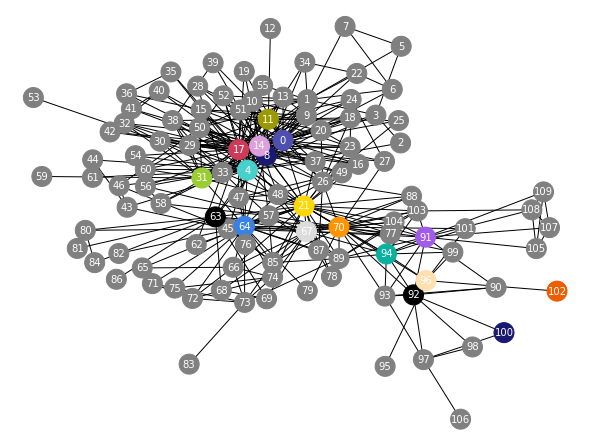

In [15]:
# set graph pattern
pos = nx.kamada_kawai_layout(G)
    
#set graph size
plt.figure(figsize=(8, 6)) 

# draw the network
nx.draw(G, pos, **options)


In [16]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 110
Number of edges: 398
Average degree:   7.2364


In [17]:
df_nodes[df_nodes['node_id']==76]

,node_id,name,value,colour
76,76,GOLD FIVE,8,#808080


In [18]:
from networkx.algorithms import degree_centrality
from networkx.algorithms import eigenvector_centrality
from networkx.algorithms import betweenness_centrality
import seaborn as sns

In [19]:
# degree
degree = degree_centrality(G)

# eigenvector_centrality
ec = eigenvector_centrality(G)

# betweeness centrality
bc = betweenness_centrality(G)

In [20]:
# visualize results
# --+ df
df = pd.DataFrame({'degree': degree, 'eigenvector_centrality': ec,
                   'betweenness_centrality': bc})

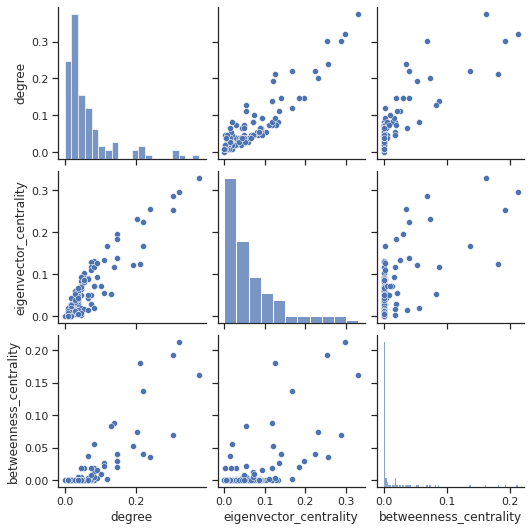

In [21]:
# --+ correlation matrix
df.corr()
# --+ scatter plot matrix

# visualization options
sns.set_theme(style="ticks")

sns.pairplot(df)

In [22]:
df

,degree,eigenvector_centrality,betweenness_centrality
0,0.238532,0.255767,0.036212
1,0.146789,0.139163,0.040897
2,0.018349,0.023463,0.000000
3,0.045872,0.049392,0.005642
4,0.321101,0.296814,0.212897
...,...,...,...
105,0.036697,0.004825,0.000000
106,0.009174,0.000181,0.000000
107,0.036697,0.004825,0.000000
108,0.045872,0.007994,0.000255


In [23]:
pd.merge(df_nodes, df, left_index = True, right_index = True).head(30)

,node_id,name,value,colour,degree,eigenvector_centrality,betweenness_centrality
0,0,QUI-GON,61,#4f4fb1,0.238532,0.255767,0.036212
1,1,NUTE GUNRAY,24,#808080,0.146789,0.139163,0.040897
2,2,PK-4,3,#808080,0.018349,0.023463,0.000000
3,3,TC-14,4,#808080,0.045872,0.049392,0.005642
4,4,OBI-WAN,147,#48D1CC,0.321101,0.296814,0.212897
5,5,DOFINE,3,#808080,0.027523,0.013608,0.000142
6,6,RUNE,10,#808080,0.036697,0.027948,0.001696
7,7,TEY HOW,4,#808080,0.027523,0.012247,0.000085
8,8,EMPEROR,51,#191970,0.201835,0.231125,0.074333
9,9,CAPTAIN PANAKA,19,#808080,0.082569,0.131763,0.000313
